In [1]:
import sys
from outletsBiasRatings import outletsBiasRatingsAllSides,outletAbbreviationToFullName
import  matplotlib.pyplot as plt
from  matplotlib.pyplot import *
import pandas as pd
import pickle
import time
from joblib import Parallel, delayed
from scipy import stats

In [2]:
outletsBiasRatings = outletsBiasRatingsAllSides
outlets = list(outletsBiasRatings.keys())
startYear = 2000
endYear = 2019
years=[str(year) for year in range(startYear,endYear+1)]

print(years)
print(len(outlets))
print(outlets)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
47
['alternet', 'democracynow', 'db', 'hp', 'theintercept', 'jacobin', 'motherjones', 'thenewyorker', 'thenation', 'slate', 'vox', 'cnn', 'nyt', 'abcnews', 'theatlantic', 'buzzfeed', 'cbs', 'economist', 'guardian', 'nbcnews', 'politico', 'timemagazine', 'wp', 'npr', 'ap', 'bbc', 'bloomberg', 'csm', 'reuters', 'thehill', 'usatoday', 'wsj', 'reason', 'we', 'wt', 'fox', 'americanspectator', 'bre', 'theblaze', 'cbn', 'dailycaller', 'dailymail', 'dailywire', 'thefederalist', 'nationalreview', 'nyp', 'newsmax']


## Load sentiment model

In [6]:
# with open('sentimentDictionaryFromDistilbertSST2.pickle', 'rb') as handle:
with open('sentimentDictionaryRobertaLargeModel.pickle', 'rb') as handle:        
    sentimentDictionary = pickle.load(handle)

In [7]:
def getMatrixOfSentimentTimeSeriesInOutlets(sentimentDictionary,outlets,startYear,endYear):
    years=[str(year) for year in range(startYear,endYear+1)]
    m=np.zeros([len(outlets),len(years)])
    for outletIndex, outlet in enumerate(outlets):
        for yearIndex, year in enumerate(years):
            try:
                m[outletIndex,yearIndex]=sentimentDictionary[outlet][year]
            except KeyError:
                m[outletIndex,yearIndex]=np.nan
    return m

In [8]:
def getAverageSentimentAcrossOutlets(sentimentDictionary,outlets,startYear,endYear,z=1.96):
    m=getMatrixOfSentimentTimeSeriesInOutlets(sentimentDictionary,outlets,startYear,endYear)    
    
    xYears = [item for item in list(range(startYear, endYear + 1))]

    n = np.sum(~np.isnan(m), axis=0)  # number of obs in each time interval

    # Aggregate the metrics of several outlets
    mAverage = np.nanmean(m, axis=0)  # Proper way when nan values are present

    # Confidence intervals
    mStd = np.nanstd(m, axis=0)

#     z = 1.96  # for a 95% C
    #     z = 2.58 # for a 99% C
    #     z = 3.291 # for a 99.9% C
    CI = z * (mStd / np.sqrt(n))

    return (xYears, mAverage, CI)
    

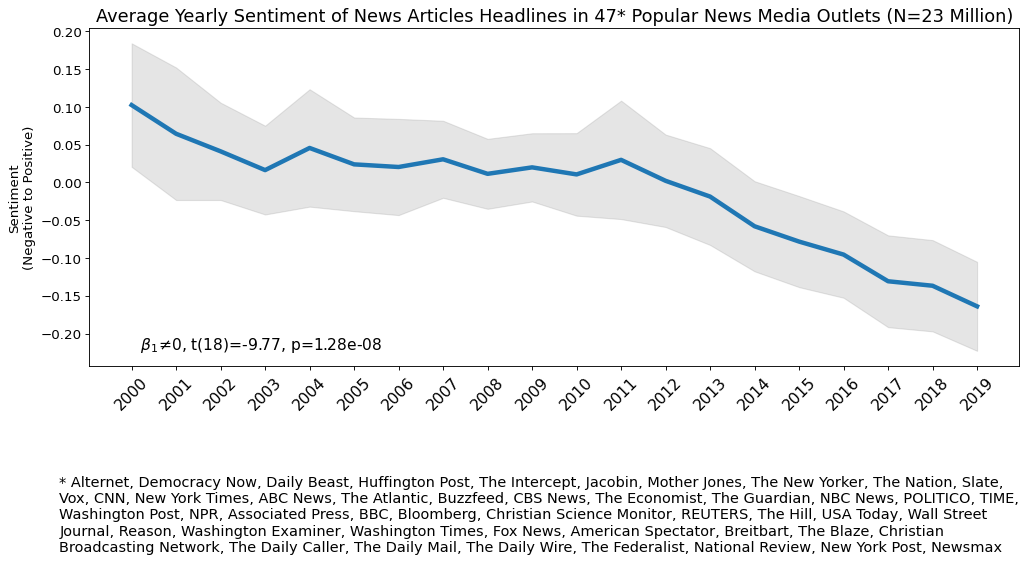

In [9]:
startYear=2000
endYear= 2019
years=[str(year) for year in range(startYear,endYear+1)]
yearsInts=[int(year) for year in years]

fig=figure(num=None, figsize=(15, 14), dpi=80, facecolor='w', edgecolor='k')

ax=plt.subplot(1,1,1)
#-------------------------------------------------------------------------    


outlets = list(outletsBiasRatings.keys())
ax=plt.subplot(2,1,2)

#Individual outlets
m=getMatrixOfSentimentTimeSeriesInOutlets(sentimentDictionary,outlets,startYear,endYear)

#Average of all outlets
_,mAverage, CI = getAverageSentimentAcrossOutlets(sentimentDictionary,outlets,startYear,endYear,z=1.96)
plt.plot(years,mAverage,linewidth=4,color='C0',label='Average of 47 news outlets')
plt.fill_between(years, mAverage+CI, mAverage-CI,color='grey', alpha=.2)

#Regression slope test 
slope, intercept, r_value, p_value, std_err=stats.linregress(yearsInts,mAverage)
df=len(yearsInts)-2 #-2 Because we are estimating two coefficients
s=r' $ \beta_1 \ne 0 $' +f", t({df})="+"{0:.2f}".format(slope/std_err)+", p={0:.2e}".format(p_value)
plt.text(0.05,0.05,s,transform=ax.transAxes,fontsize=14)

plt.xticks(years[::1],fontsize=14,rotation=45)
plt.yticks(fontsize=12)
plt.ylabel("Sentiment\n(Negative to Positive)",fontsize=12)
plt.title(f'Average Yearly Sentiment of News Articles Headlines in 47* Popular News Media Outlets (N=23 Million)',fontsize=16)
s ="""* Alternet, Democracy Now, Daily Beast, Huffington Post, The Intercept, Jacobin, Mother Jones, The New Yorker, The Nation, Slate,\nVox, CNN, New York Times, ABC News, The Atlantic, Buzzfeed, CBS News, The Economist, The Guardian, NBC News, POLITICO, TIME,\nWashington Post, NPR, Associated Press, BBC, Bloomberg, Christian Science Monitor, REUTERS, The Hill, USA Today, Wall Street\nJournal, Reason, Washington Examiner, Washington Times, Fox News, American Spectator, Breitbart, The Blaze, Christian\nBroadcasting Network, The Daily Caller, The Daily Mail, The Daily Wire, The Federalist, National Review, New York Post, Newsmax"""
plt.figtext(0.1,-0.04,s,fontsize=13)
plt.subplots_adjust(hspace = 0.5)  
plt.show()

# fig.savefig('../manuscript/figures/sm/1-2averageSentimentOfHeadlinesDistilBert.png',dpi=400,bbox_inches='tight',pad_inches=0)#High-resolution    
fig.savefig('../manuscript/figures/1-2averageSentimentOfHeadlines.png',dpi=300,bbox_inches='tight',pad_inches=0)#High-resolution    

   

In [10]:
yearsInts=[int(year) for year in years]
x=yearsInts
slope, intercept, r_value, p_value, std_err=stats.linregress(x,mAverage)
print("slope: ",slope, "t-statistic", slope/std_err ,"p_value: ", p_value, "r_value: ", r_value,)

slope:  -0.011263364779971065 t-statistic -9.76620744818761 p_value:  1.2837060326327348e-08 r_value:  -0.9171914589612721


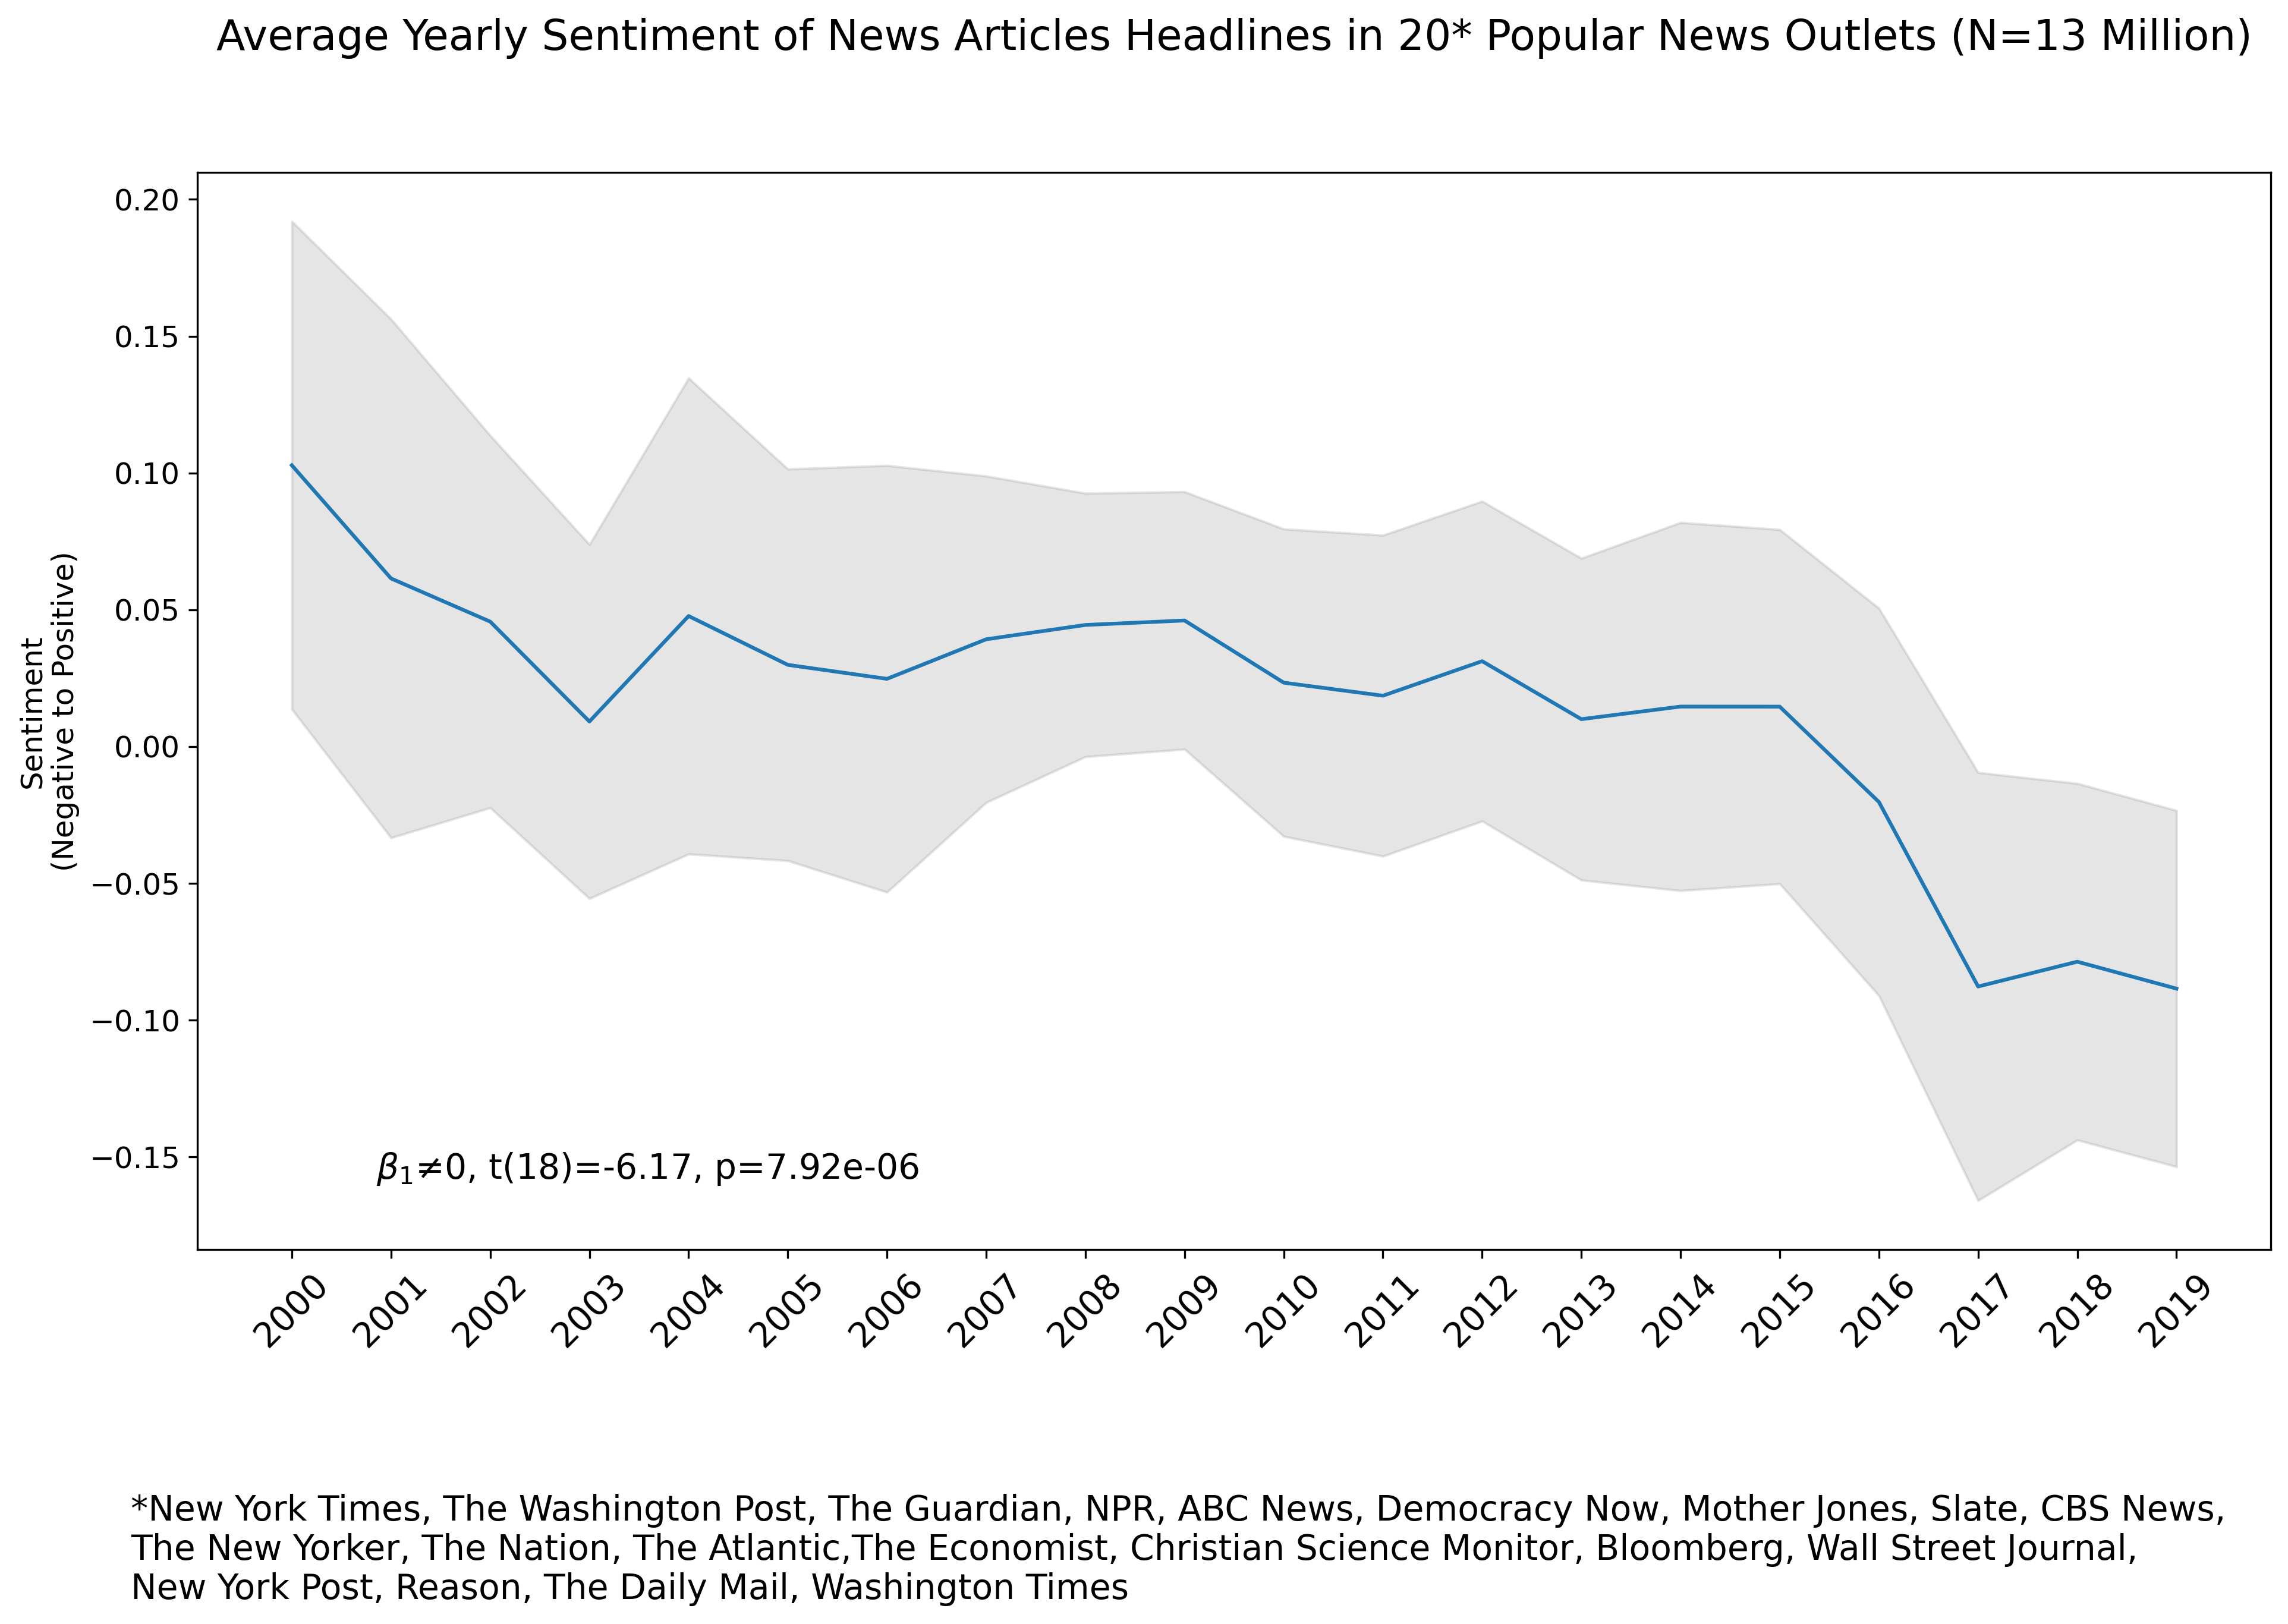

In [11]:
outlets = list(outletsBiasRatings.keys())
outlets = ['nyp','dailymail','wt','wsj','reason'
           'csm','bloomberg',
           'wp','guardian','economist','cbs','nyt','slate',
          'thenewyorker','thenation','theatlantic','npr','abcnews','democracynow','motherjones'
          ]

startYear=2000
endYear= 2019
years=[str(year) for year in range(startYear,endYear+1)]

figure(num=None, figsize=(15, 8), dpi=300, facecolor='w', edgecolor='k')

    
years,mAverage, CI = getAverageSentimentAcrossOutlets(sentimentDictionary,outlets,startYear,endYear,z=1.96)
plt.plot(years,mAverage)
plt.fill_between(years, mAverage+CI, mAverage-CI,color='grey', alpha=.2)

#Regression slope test 
slope, intercept, r_value, p_value, std_err=stats.linregress(yearsInts,mAverage)
df=len(yearsInts)-2 #-2 Because we are estimating two coefficients
s=r' $ \beta_1 \ne 0 $' +f", t({df})="+"{0:.2f}".format(slope/std_err)+", p={0:.2e}".format(p_value)
plt.text(0.5,1.8,s,transform=ax.transAxes,fontsize=14)


plt.xticks(years[::1],fontsize=14,rotation=45)
plt.yticks(fontsize=12)
plt.ylabel("Sentiment\n(Negative to Positive)",fontsize=12)
plt.title(f'Average Yearly Sentiment of News Articles Headlines in 20* Popular News Outlets (N=13 Million)',fontsize=17, y=1.1)
s = "*New York Times, The Washington Post, The Guardian, NPR, ABC News, Democracy Now, Mother Jones, Slate, CBS News,\nThe New Yorker, The Nation, The Atlantic,The Economist, Christian Science Monitor, Bloomberg, Wall Street Journal,\nNew York Post, Reason, The Daily Mail, Washington Times"    
plt.figtext(0.1,-0.12,s,fontsize=14)

# plt.savefig('../manuscript/figures/sm/1-2averageSentimentOfHeadlinesDistilBertOnlyOutletsWithArticlesSince2000.png',dpi=300,bbox_inches='tight',pad_inches=0.1)#High-resolution    
plt.savefig('../manuscript/figures/sm/1-2averageSentimentOfHeadlinesOnlyOutletsWithArticlesSince2000.png',dpi=300,bbox_inches='tight',pad_inches=0.1)#High-resolution    
plt.show()   

In [12]:
yearsInts=[int(year) for year in years]
x=yearsInts
slope, intercept, r_value, p_value, std_err=stats.linregress(x,mAverage)
print("slope: ",slope, "t-statistic", slope/std_err ,"p_value: ", p_value, "r_value: ", r_value,)

slope:  -0.006876667137360436 t-statistic -6.173218689176717 p_value:  7.919561313330622e-06 r_value:  -0.8241321069046293
